# ARIMA

In [1]:
import pandas as pd
import matplotlib as plot

data = pd.read_csv('DATA_TA.csv',sep=',', header=0)
data.head()

,penyinaran,kelembapan,angin,temperatur,uap,curah,IR
0,58,80,3,23.6,3.9,183.8,8.510771
1,55,81,4,23.1,3.5,208.5,5.462136
2,38,83,4,22.9,4.1,200.5,3.747280
3,53,83,3,23.4,3.2,165.6,2.635798
4,58,80,3,23.6,3.2,183.8,3.429714


In [2]:
series = data['IR']
series.head()

0    8.510771
1    5.462136
2    3.747280
3    2.635798
4    3.429714
Name: IR, dtype: float64

In [3]:
exogs = data.drop(columns='IR')
exogs.head()

,penyinaran,kelembapan,angin,temperatur,uap,curah
0,58,80,3,23.6,3.9,183.8
1,55,81,4,23.1,3.5,208.5
2,38,83,4,22.9,4.1,200.5
3,53,83,3,23.4,3.2,165.6
4,58,80,3,23.6,3.2,183.8


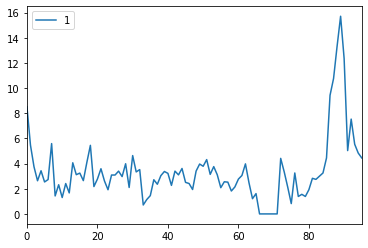

In [27]:
series.plot()

In [39]:
data.corr(method='pearson')

,penyinaran,kelembapan,angin,temperatur,uap,curah,IR
penyinaran,1.000000,-0.802215,-0.174019,0.109694,0.491091,-0.692549,-0.109852
kelembapan,-0.802215,1.000000,-0.085415,-0.240107,-0.680081,0.669995,0.246669
angin,-0.174019,-0.085415,1.000000,0.203445,0.047086,0.015603,0.242694
temperatur,0.109694,-0.240107,0.203445,1.000000,0.330581,-0.068673,0.117225
uap,0.491091,-0.680081,0.047086,0.330581,1.000000,-0.421425,-0.333577
curah,-0.692549,0.669995,0.015603,-0.068673,-0.421425,1.000000,0.176569
IR,-0.109852,0.246669,0.242694,0.117225,-0.333577,0.176569,1.000000


In [43]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data.IR)
# print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] <= 0.05:
    print('data sudah stasioner tidak perlu differencing')
else:
    print('data tidak stasioner perlu differencing')

p-value: 0.005928
data sudah stasioner tidak perlu differencing


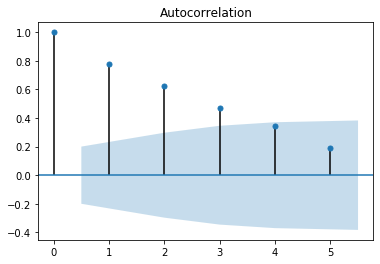

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from pandas import Series

#plot_acf(series, ax=pyplot.gca(),lags=5)
#pyplot.show()

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

diff = (series)
plot_acf(diff, ax=pyplot.gca(),lags=5)
pyplot.show()

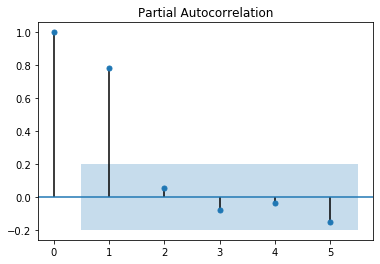

In [6]:
plot_pacf(diff, ax=pyplot.gca(),lags=5)
pyplot.show()

# fitting model

                              ARMA Model Results                              
Dep. Variable:                     IR   No. Observations:                   96
Model:                     ARMA(1, 1)   Log Likelihood                -176.311
Method:                           mle   S.D. of innovations              1.510
Date:                Mon, 15 Jul 2019   AIC                            372.621
Time:                        01:04:54   BIC                            398.265
Sample:                             0   HQIC                           382.987
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8004     11.653     -0.841      0.403     -32.640      13.039
penyinaran     0.0363      0.023      1.569      0.120      -0.009       0.082
kelembapan     0.1624      0.061      2.648      0.0

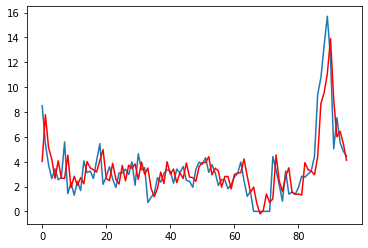

Score: 1.554752 RMSE


In [7]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math
model = ARIMA(series, order=(1,0,1),exog = exogs)
model_fit = model.fit(disp=0, method='mle')
print(model_fit.summary())

pred = model_fit.predict()
plot.pyplot.plot(series)
plot.pyplot.plot(pred, color='red')
plot.pyplot.show()

RMSE = math.sqrt(mean_squared_error(series, pred))
print('Score: %f RMSE' % (RMSE))

model_fit.save('test')

# Plot Residual

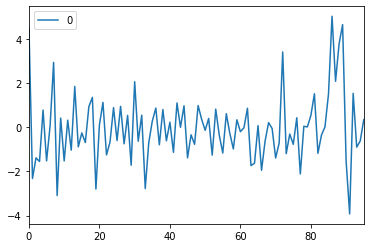

In [8]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plot.pyplot.show()

In [9]:
series.to_csv("series.csv",sep=",")
pred.to_csv("predict.csv",sep=",")
residuals.to_csv("residu.csv",sep=",",header=None)

C:\Users\Delva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
C:\Users\Delva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


# LSTM

In [10]:
residu = pd.read_csv('residu.csv', usecols=[1], engine='python',header=None)
arima = pd.read_csv('predict.csv', usecols=[1], engine='python',header=None)
series = pd.read_csv('series.csv', usecols=[1], engine='python',header=None)

dataset = residu.values
dataset = dataset.astype('float32')

target = residu.values
target = target.astype('float32')

In [11]:
import numpy
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [12]:
# Data Normalisasi
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

scaler_target = MinMaxScaler(feature_range=(0,1))
target = scaler_target.fit_transform(target)

In [13]:
# # target = numpy.zeros_like(dataset)
# train_size = int(len(dataset) * 1)
# test_size = len(dataset)
# trainX, testX = dataset[0:train_size], dataset
# trainY, testY = target[0:train_size,:], target
# # print(len(train), len(test))

# split into train and test sets
train_size = int(len(dataset) * 0.65)
test_size = len(dataset)
trainX, testX = dataset[0:train_size], dataset
trainY, testY = target[0:train_size], target
# train, test = dataset, dataset
# print(len(train), len(test))

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# # reshape into X=t and Y=t+1
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

In [16]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=250,verbose=0)

W0715 01:05:17.486202  7536 deprecation_wrapper.py:119] From C:\Users\Delva\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 01:05:17.542341  7536 deprecation_wrapper.py:119] From C:\Users\Delva\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 01:05:17.605418  7536 deprecation_wrapper.py:119] From C:\Users\Delva\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 01:05:17.612509  7536 deprecation_wrapper.py:119] From C:\Users\Delva\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.un

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# calculate root mean squared error
trainPredict = scaler.inverse_transform(trainPredict)
trainScore = math.sqrt(mean_squared_error(trainY, residu[0:train_size]))
print('Train Score: %f RMSE' % (trainScore))

testPredict = scaler.inverse_transform(testPredict)
testScore = math.sqrt(mean_squared_error(testY, testPredict[:]))
print('Test Score: %f RMSE' % (testScore))

Train Score: 1.291999 RMSE
Test Score: 1.389713 RMSE


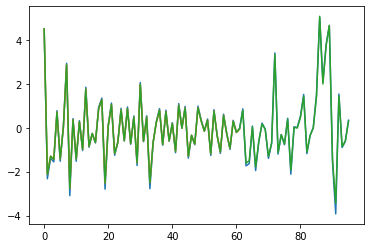

In [19]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(target)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(target)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[:len(testPredict), :] = testPredict
# plot baseline and predictions
# pyplot.plot(residuals.values)
pyplot.plot(residu)
pyplot.plot(trainPredictPlot)
pyplot.plot(testPredictPlot)
pyplot.show()

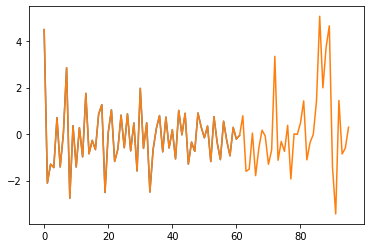

In [20]:
pyplot.plot(trainPredict)
pyplot.plot(testPredictPlot)
pyplot.show()

In [21]:
# pyplot.plot(history.history['loss'], label='train')
# pyplot.legend()
# pyplot.show()

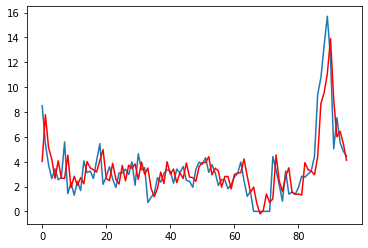

In [22]:
pyplot.plot(data.IR)
pyplot.plot(arima,color='red')
pyplot.show()

In [23]:
dp = pd.DataFrame(testPredict)
dp.head()

,0
0,4.497518
1,-2.112765
2,-1.296401
3,-1.441931
4,0.707718


In [24]:
arima.columns = ['var']
dp.columns = ['var']
serieshb = arima.add(dp, fill_value=0)
serieshb.head()

,var
0,8.520221
1,5.674133
2,3.840700
3,2.747814
4,3.364142


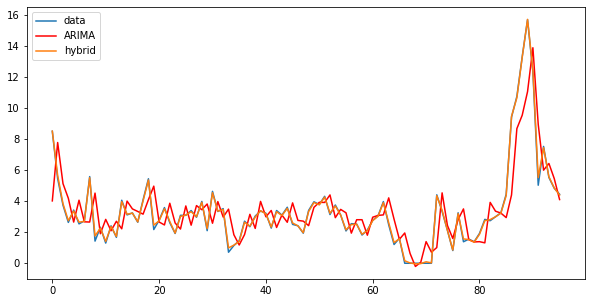

In [25]:
pyplot.figure(figsize=(10,5))
pyplot.plot(data.IR,label='data')
pyplot.plot(arima,color='red',label='ARIMA')
pyplot.plot(serieshb,label='hybrid')
pyplot.legend()
pyplot.savefig('plot.png')
pyplot.show()

In [26]:
Score = math.sqrt(mean_squared_error(data.IR, serieshb))
print('Hybrid Score: %f RMSE' % (Score))

Hybrid Score: 0.099640 RMSE
